In [ ]:
Importing the required libraries

In [1]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

Loading the data

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Analysing the data

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

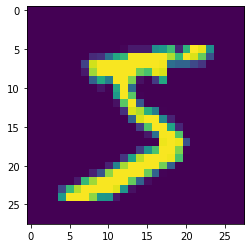

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

 Reshaping the data

In [7]:
X_train=X_train.reshape(60000,28,28,1).astype('float32')
X_test=X_test.reshape(10000,28,28,1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Model creating

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.2504 - accuracy: 0.9488 - val_loss: 0.1019 - val_accuracy: 0.9681
Epoch 2/5
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0731 - accuracy: 0.9778 - val_loss: 0.0710 - val_accuracy: 0.9767
Epoch 3/5
1875/1875 [==============================] - 170s 91ms/step - loss: 0.0494 - accuracy: 0.9840 - val_loss: 0.0922 - val_accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 168s 89ms/step - loss: 0.0408 - accuracy: 0.9872 - val_loss: 0.0952 - val_accuracy: 0.9756
Epoch 5/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.1016 - val_accuracy: 0.9745


Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10160219669342041, 0.9745000004768372]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 96ms/step
[[3.1985040e-11 2.6928238e-12 1.1639130e-09 6.9380761e-08 2.0420460e-12
  1.8735447e-11 5.4169054e-16 9.9999964e-01 1.5318657e-08 1.6423560e-07]
 [1.4883487e-10 1.7337460e-07 9.9999964e-01 3.5367054e-13 3.4504314e-13
  1.5326859e-13 2.0963586e-07 1.7444811e-15 1.0131210e-09 2.1407159e-19]
 [5.0680144e-11 9.9996126e-01 6.1584583e-06 5.3597473e-14 1.0245189e-05
  2.4711926e-07 4.3516887e-10 3.3853374e-07 2.1733187e-05 7.3300269e-11]
 [1.0000000e+00 2.2732191e-16 1.6053230e-09 3.4346147e-17 2.4410799e-12
  1.0616660e-11 4.8161454e-11 1.3733837e-12 2.0989488e-10 6.1291361e-10]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
